# Result from model
example


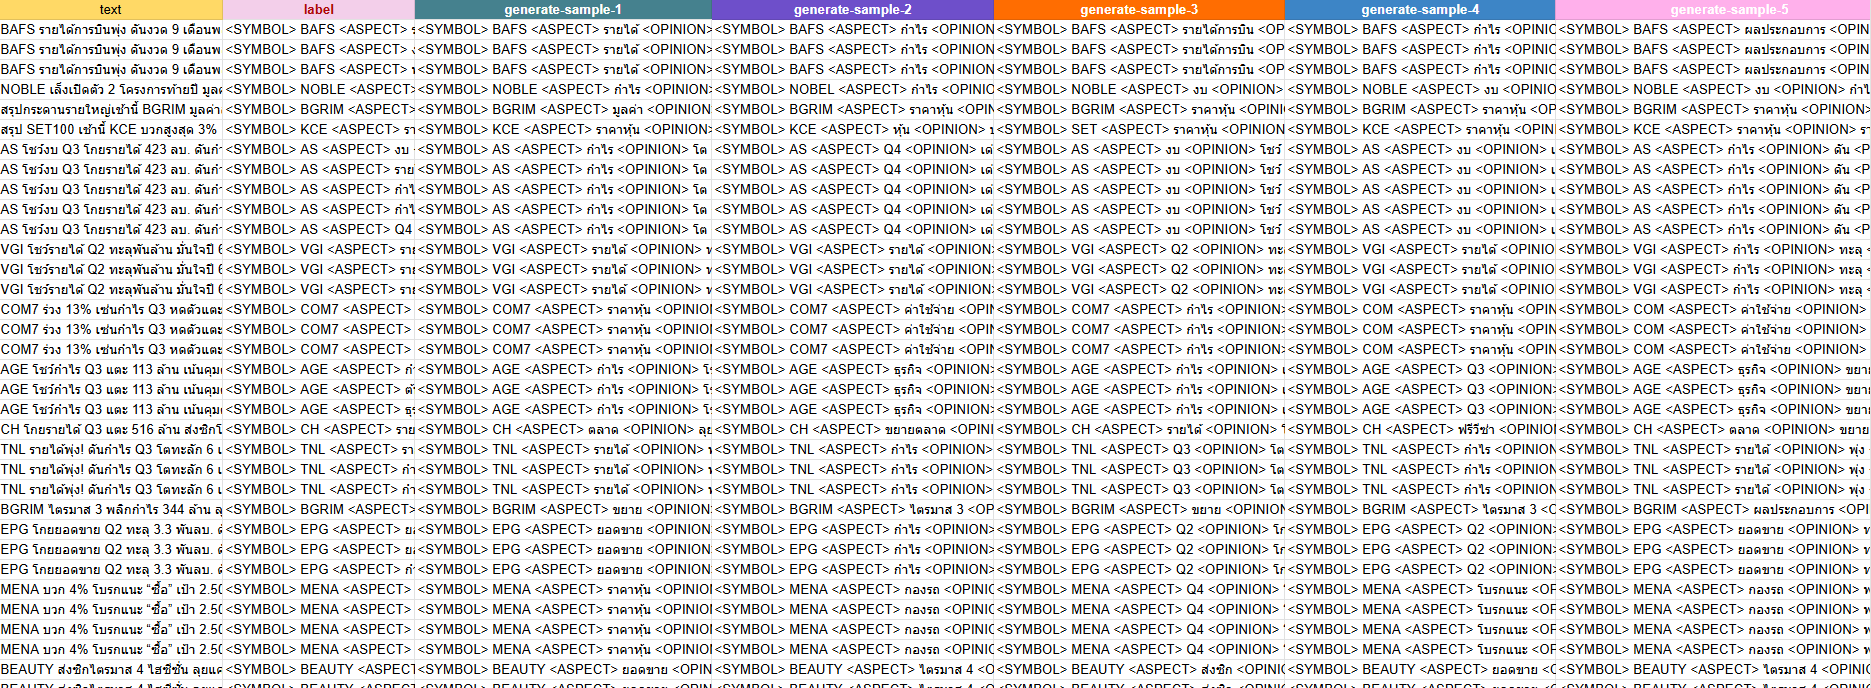



# *Focus on each file*
# **Oct.IloveU:💖💚**
# **END 💖💚****

# **BLEU**

In [ ]:
import nltk
nltk.download('punkt')


In [ ]:
import nltk
nltk.download('punkt')  # ดาวน์โหลด resource punkt สำหรับการแยกคำ

import pandas as pd
from nltk.translate.bleu_score import sentence_bleu
from nltk.tokenize import word_tokenize

# โหลดข้อมูลจาก CSV
df = pd.read_csv('/content/md_fillnote_testing5 - md_fillnote_testing5 (1).csv')

# ฟังก์ชันคำนวณ BLEU score
def calculate_bleu_score(reference, generated):
    # Tokenize ข้อความทั้งสอง
    reference_tokens = word_tokenize(reference.lower())
    generated_tokens = word_tokenize(generated.lower())

    # คำนวณ BLEU score
    return sentence_bleu([reference_tokens], generated_tokens)

# ฟังก์ชันหาค่าคล้ายคลึงสูงสุดระหว่าง label ทั้งหมดกับ generated sample
def find_max_bleu_for_group(news_group, sample_column):
    max_bleu = 0
    generated_sample = news_group[sample_column].iloc[0]  # ค่า generate-sample สำหรับทุกแถวในกลุ่มข่าวนี้

    # เปรียบเทียบกับทุกแถวของ label
    for _, row in news_group.iterrows():
        label = row['label']
        bleu_score = calculate_bleu_score(label, generated_sample)

        # ถ้า BLEU score สูงกว่า ให้ตั้งค่าเป็นค่าสูงสุดใหม่
        if bleu_score > max_bleu:
            max_bleu = bleu_score

    return max_bleu

# คำนวณ BLEU score สำหรับแต่ละกลุ่มข่าวและคอลัมน์ generated-sample
sample_columns = ['generate-sample-1', 'generate-sample-2', 'generate-sample-3', 'generate-sample-4', 'generate-sample-5']

# สำหรับแต่ละกลุ่มข่าว
for name, news_group in df.groupby('text'):
    for sample in sample_columns:
        # หา max BLEU score ของกลุ่มข่าวนี้สำหรับ generated sample นั้น ๆ
        max_bleu = find_max_bleu_for_group(news_group, sample)

        # ตั้งค่าคล้ายคลึงเดียวกันในทุกแถวของข่าวนั้นในคอลัมน์นั้น
        df.loc[news_group.index, f'{sample}_bleu_score'] = max_bleu

# แสดงผลลัพธ์ DataFrame
display(df.head())


In [ ]:
# ฟังก์ชันคำนวณค่าเฉลี่ยของ BLEU score
def calculate_average_bleu_score(df, sample_columns):
    avg_bleu = {}

    for sample in sample_columns:
        avg_bleu[sample] = df[f'{sample}_bleu_score'].mean()  # หาค่าเฉลี่ยของแต่ละคอลัมน์

    # คำนวณค่าเฉลี่ยรวมทุกคอลัมน์
    overall_average = sum(avg_bleu.values()) / len(sample_columns)

    return avg_bleu, overall_average

# คำนวณค่าเฉลี่ยของ BLEU score สำหรับแต่ละคอลัมน์และค่าเฉลี่ยรวม
avg_bleu, overall_average = calculate_average_bleu_score(df, sample_columns)

# แสดงผลลัพธ์ค่าเฉลี่ยของ BLEU score (เป็นเปอร์เซ็นต์)
print("Average BLEU score (percentage) for each generated sample:")
for sample, avg_bleu_score in avg_bleu.items():
    print(f"{sample}: {avg_bleu_score * 100:.2f}%")  # แปลงค่าเป็นเปอร์เซ็นต์โดยคูณด้วย 100

# แสดงค่าเฉลี่ยรวม (เป็นเปอร์เซ็นต์)
print(f"Overall average BLEU score: {overall_average * 100:.2f}%")


In [ ]:
import pandas as pd

# สมมุติว่า df คือตัวแปร DataFrame ที่มีข้อมูลข่าวและค่า similarity
# สำหรับตัวอย่างนี้ เราจะสมมุติว่า df มีคอลัมน์สำหรับ cosine similarity หรือ BLEU score ที่คำนวณเสร็จแล้ว
# ค่าของ cosine similarity หรือ BLEU จะถูกเพิ่มเข้าไปใน df แล้วเราจะบันทึกเป็นไฟล์ CSV

# โค้ดเพื่อบันทึก DataFrame ลงไฟล์ CSV
def save_results_to_csv(df, filename):
    # บันทึก DataFrame ลงในไฟล์ CSV
    df.to_csv(filename, index=False)
    print(f"ผลลัพธ์ถูกบันทึกลงไฟล์ {filename}")

# สมมุติว่าเราได้คำนวณค่า similarity และเก็บไว้ใน DataFrame แล้ว
# ตัวอย่างการเรียกใช้
save_results_to_csv(df, 'model_results.csv')


# **Cosine Similarity**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# โหลดข้อมูลจาก CSV
df = pd.read_csv('/content/fuzzy_test5 - Sheet1.csv')

# ฟังก์ชันคำนวณ cosine similarity
def calculate_cosine_similarity(text1, text2):
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform([text1, text2])
    return cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])[0][0]

# ฟังก์ชันหาค่าคล้ายคลึงสูงสุดระหว่าง label ทั้งหมดกับ generated sample
def find_max_cosine_for_group(news_group, sample_column):
    max_similarity = 0
    generated_sample = news_group[sample_column].iloc[0]  # ค่า generate-sample สำหรับทุกแถวในกลุ่มข่าวนี้

    # เปรียบเทียบกับทุกแถวของ label
    for _, row in news_group.iterrows():
        label = row['label']
        similarity = calculate_cosine_similarity(label, generated_sample)

        # ถ้า similarity สูงกว่า ให้ตั้งค่าเป็นค่าสูงสุดใหม่
        if similarity > max_similarity:
            max_similarity = similarity

    return max_similarity

# คำนวณ cosine similarity สำหรับแต่ละกลุ่มข่าวและคอลัมน์ generated-sample
sample_columns = ['generate-sample-1', 'generate-sample-2', 'generate-sample-3', 'generate-sample-4', 'generate-sample-5']

# สำหรับแต่ละกลุ่มข่าว
for name, news_group in df.groupby('text'):
    for sample in sample_columns:
        # หา max cosine similarity ของกลุ่มข่าวนี้สำหรับ generated sample นั้น ๆ
        max_similarity = find_max_cosine_for_group(news_group, sample)

        # ตั้งค่าคล้ายคลึงเดียวกันในทุกแถวของข่าวนั้นในคอลัมน์นั้น
        df.loc[news_group.index, f'{sample}_cosine_similarity'] = max_similarity

# แสดงผลลัพธ์ DataFrame
display(df.head())


In [ ]:
# บันทึกผลลัพธ์เป็นไฟล์ CSV
df.to_csv('/content/cos_.csv', index=False)
# /content/md_fillnote_testing.csv

In [ ]:
# ฟังก์ชันคำนวณค่าเฉลี่ยของ cosine similarity
def calculate_average_cosine_similarity(df, sample_columns):
    avg_similarity = {}

    for sample in sample_columns:
        avg_similarity[sample] = df[f'{sample}_cosine_similarity'].mean()  # หาค่าเฉลี่ยของแต่ละคอลัมน์

    # คำนวณค่าเฉลี่ยรวมทุกคอลัมน์
    overall_average = sum(avg_similarity.values()) / len(sample_columns)

    return avg_similarity, overall_average

# คำนวณค่าเฉลี่ยของ cosine similarity สำหรับแต่ละคอลัมน์และค่าเฉลี่ยรวม
avg_similarity, overall_average = calculate_average_cosine_similarity(df, sample_columns)

# แสดงผลลัพธ์ค่าเฉลี่ยของ cosine similarity (เป็นเปอร์เซ็นต์)
print("Average cosine similarity (percentage) for each generated sample:")
for sample, avg_sim in avg_similarity.items():
    print(f"{sample}: {avg_sim * 100:.2f}%")  # แปลงค่าเป็นเปอร์เซ็นต์โดยคูณด้วย 100

# แสดงค่าเฉลี่ยรวม (เป็นเปอร์เซ็นต์)
print(f"Overall average cosine similarity: {overall_average * 100:.2f}%")


# **Fuzzy Matching**

In [ ]:
!pip install fuzzywuzzy


In [ ]:
import pandas as pd

# นำเข้าไฟล์ generated_texts.csv
file_path = '/content/fuzzy_test5 - Sheet1.csv'  # เปลี่ยนเป็นพาธที่ถูกต้อง
df = pd.read_csv(file_path)

# ดูข้อมูลในไฟล์
df.head()


In [ ]:
import pandas as pd
from fuzzywuzzy import fuzz
import unicodedata

# ฟังก์ชันทำความสะอาดข้อความ
def clean_text(text):
    text = unicodedata.normalize('NFC', text)
    text = text.replace("('", '').replace("</s>", '').replace("',)", '').strip()
    return text

# ฟังก์ชันตรวจสอบด้วย Fuzzy Matching
def fuzzy_compare_texts(label, generated, threshold=90):
    cleaned_label = clean_text(label)
    cleaned_generated = clean_text(generated)
    similarity_score = fuzz.ratio(cleaned_label, cleaned_generated)
    return similarity_score >= threshold

# ฟังก์ชันที่จะตรวจสอบ generated-sample สำหรับข่าวทั้งหมด
def check_samples_for_news_group(news_group, sample_columns, threshold=90):
    results = {}

    for sample in sample_columns:
        # ตรวจสอบว่าผลลัพธ์จาก generated-sample ใดตรงกับ label ใดหรือไม่
        any_match = False
        for _, row in news_group.iterrows():
            label = clean_text(row['label'])
            generated_sample = clean_text(row[sample])
            if fuzzy_compare_texts(label, generated_sample, threshold):
                any_match = True
                break

        # ถ้าเจอ match ใด ๆ ให้แถวทั้งหมดในกลุ่มนี้เป็น True
        results[sample] = any_match

    # เพิ่มคอลัมน์ใหม่สำหรับผลลัพธ์ของแต่ละ generated-sample โดยการทำสำเนาข้อมูลเดิม
    for sample in sample_columns:
        news_group[f'{sample}_correct'] = results[sample]

    return news_group

# รายชื่อคอลัมน์ generate-sample ที่ต้องการตรวจสอบ
sample_columns = ['generate-sample-1', 'generate-sample-2', 'generate-sample-3', 'generate-sample-4', 'generate-sample-5']

# นำข่าวกลุ่มเดียวกันมาตรวจสอบ แต่รักษาโครงสร้างของ DataFrame ไว้
df = df.groupby('text', group_keys=False).apply(check_samples_for_news_group, sample_columns=sample_columns)

# แสดงผลลัพธ์
df.head()


In [ ]:
# บันทึกผลลัพธ์เป็นไฟล์ CSV
df.to_csv('/content/cos_.csv', index=False)
# /content/md_fillnote_testing.csv

In [ ]:
# ฟังก์ชันคำนวณค่าเฉลี่ยของ cosine similarity
def calculate_average_cosine_similarity(df, sample_columns):
    avg_similarity = {}

    for sample in sample_columns:
        avg_similarity[sample] = df[f'{sample}_cosine_similarity'].mean()  # หาค่าเฉลี่ยของแต่ละคอลัมน์

    # คำนวณค่าเฉลี่ยรวมทุกคอลัมน์
    overall_average = sum(avg_similarity.values()) / len(sample_columns)

    return avg_similarity, overall_average

# คำนวณค่าเฉลี่ยของ cosine similarity สำหรับแต่ละคอลัมน์และค่าเฉลี่ยรวม
avg_similarity, overall_average = calculate_average_cosine_similarity(df, sample_columns)

# แสดงผลลัพธ์ค่าเฉลี่ยของ cosine similarity (เป็นเปอร์เซ็นต์)
print("Average cosine similarity (percentage) for each generated sample:")
for sample, avg_sim in avg_similarity.items():
    print(f"{sample}: {avg_sim * 100:.2f}%")  # แปลงค่าเป็นเปอร์เซ็นต์โดยคูณด้วย 100

# แสดงค่าเฉลี่ยรวม (เป็นเปอร์เซ็นต์)
print(f"Overall average cosine similarity: {overall_average * 100:.2f}%")
